In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [72]:
df = pd.read_csv('D:/hencil/Devlopment/Samples/data/CRM-APP.csv', names=['value'], header=0)

df["value"]

23/4/2021    126
24/4/2021    127
25/4/2021    129
26/4/2021    121
27/4/2021    135
            ... 
8/9/2021     606
9/9/2021     508
10/9/2021    461
11/9/2021    390
12/9/2021    432
Name: value, Length: 143, dtype: int64

In [73]:
df.values

array([[126],
       [127],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
      

In [86]:
model = pm.auto_arima(df.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      #m=1,              # frequency of series
                      #d=None,           # let model determine 'd'
                      #seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1400.701, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1776.890, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1418.943, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2044.440, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1399.356, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1404.462, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1399.360, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1399.440, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1402.102, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1401.343, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1401.922, Time=0.04 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.760 seconds
                               S

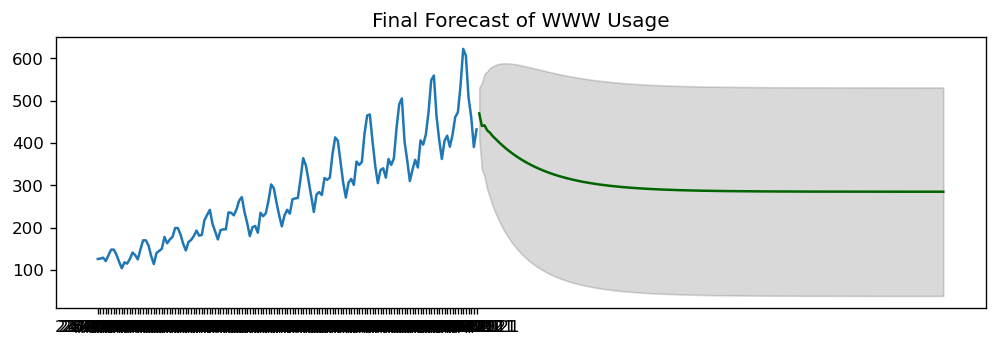

In [87]:
# Forecast
n_periods = 175
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})

plt.show()

### second approach 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

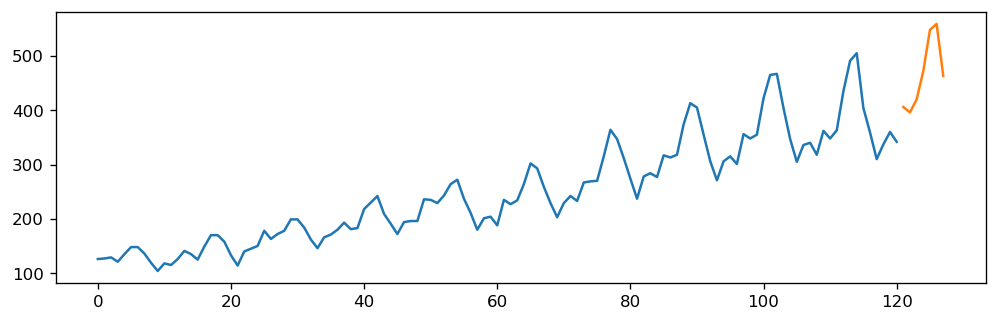

In [127]:
#load the data
data = pd.read_csv('D:/hencil/Devlopment/Samples/data/CRM-APP.csv')

#divide into train and validation set
train = data[:int(0.85*(len(data)))]
valid = data[int(0.85*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('date',axis=1,inplace=True)
valid.drop('date',axis=1,inplace=True)

#plotting the data
train['value'].plot()
valid['value'].plot()

In [69]:
#building the model
#from pyramid.arima import auto_arima


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1097.699, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1149.636, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1141.709, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1137.608, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1148.110, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1135.655, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.307 seco

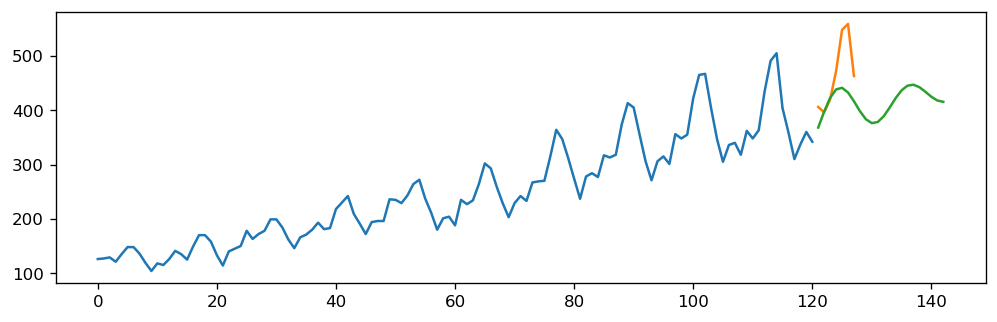

In [128]:
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))

forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [129]:
forecast

,Prediction
121,368.116945
122,397.576240
123,422.870249
124,438.290207
125,441.259736
126,432.719371
127,416.549799
128,398.275549
129,383.457583
130,376.226813


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1097.699, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1149.636, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1141.709, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1137.608, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1148.110, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1135.655, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.305 seco

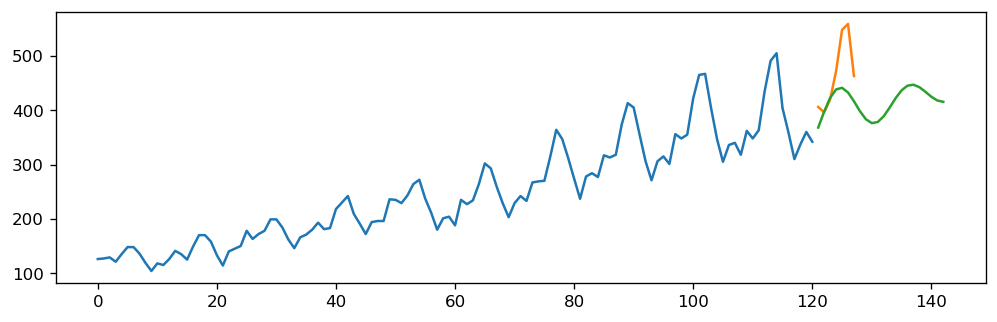

In [130]:
model = pm.auto_arima(train.value,D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train.value)

forecast = model.predict(n_periods=len(valid.value))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train.value, label='Train')
plt.plot(valid.value, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [131]:
test = model.predict(n_periods=100)

In [132]:
test

array([368.11694542, 397.5762397 , 422.8702487 , 438.290207  ,
       441.25973558, 432.71937109, 416.54979893, 398.27554901,
       383.45758344, 376.22681274, 378.33117202, 388.89887992,
       404.91310491, 422.20654128, 436.66554202, 445.30738245,
       446.95910953, 442.39668011, 433.95831832, 424.78304934,
       417.9098465 , 415.48745517, 418.29242289, 425.65328102,
       435.76279441, 446.25978969, 454.90224214, 460.1459888 ,
       461.48564725, 459.49031153, 455.55321413, 451.44800059,
       448.82646793, 448.79539132, 451.67636934, 456.99473416,
       463.67899545, 470.39863116, 475.93839884, 479.50726779,
       480.90681483, 480.52793862, 479.1928329 , 477.89828449,
       477.53707327, 478.67282338, 481.42253672, 485.46763062,
       490.17854287, 494.80948704, 498.70554947, 501.46648603,
       503.02817856, 503.64803026, 503.80713723, 504.06276758,
       504.89461331, 506.58584885, 509.16703002, 512.43170952,
       516.01294485, 519.49486815, 522.52668099, 524.90

In [157]:
data = pd.read_csv('D:/hencil/Devlopment/Samples/data/CRM-APP1.csv')
copy_data = data.copy()
#copy_data = copy_data[: int(.90*len(copy_data))]
copy_data.drop('date', axis=1, inplace=True)

In [158]:
#copy_data
data

,date,value
0,23/4/2021,126
1,24/4/2021,127
2,25/4/2021,129
3,26/4/2021,121
4,27/4/2021,135
...,...,...
123,24/8/2021,420
124,25/8/2021,472
125,26/8/2021,548
126,27/8/2021,559


In [175]:
model_2 = pm.auto_arima(copy_data,D=0, trace=False, error_action='ignore', suppress_warnings=True)
model_2.fit(copy_data)
n_periods_2 = 20
forecast2 = model_2.predict(n_periods=n_periods_2)
index_of_fc_2 = np.arange(len(copy_data), len(copy_data)+n_periods_2)
forecast2 = pd.DataFrame(forecast2,index = index_of_fc_2,columns=['Prediction'])
#plot the predictions for validation set


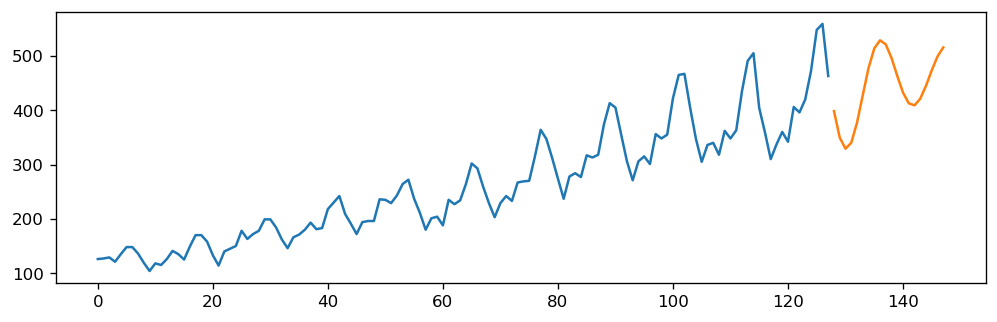

In [186]:
plt.plot(copy_data, label='actual')
#plt.plot(valid.value, label='Valid')
plt.plot(forecast2, label='Prediction')
#plt.xticks(np.array(data['date'].values))

plt.show()


In [153]:
np.sum(forecast2)

Prediction    8831.582845
dtype: float64

In [154]:
copy_data

,value
0,126
1,127
2,129
3,121
4,135
...,...
123,420
124,472
125,548
126,559


0      23/4/2021
1      24/4/2021
2      25/4/2021
3      26/4/2021
4      27/4/2021
         ...    
123    24/8/2021
124    25/8/2021
125    26/8/2021
126    27/8/2021
127    28/8/2021
Name: date, Length: 128, dtype: object

In [172]:
str(data['date'].values)

"['23/4/2021' '24/4/2021' '25/4/2021' '26/4/2021' '27/4/2021' '28/4/2021'\n '29/4/2021' '30/4/2021' '1/5/2021' '2/5/2021' '3/5/2021' '4/5/2021'\n '5/5/2021' '6/5/2021' '7/5/2021' '8/5/2021' '9/5/2021' '10/5/2021'\n '11/5/2021' '12/5/2021' '13/5/2021' '14/5/2021' '15/5/2021' '16/5/2021'\n '17/5/2021' '18/5/2021' '19/5/2021' '20/5/2021' '21/5/2021' '22/5/2021'\n '23/5/2021' '24/5/2021' '25/5/2021' '26/5/2021' '27/5/2021' '28/5/2021'\n '29/5/2021' '30/5/2021' '31/5/2021' '1/6/2021' '2/6/2021' '3/6/2021'\n '4/6/2021' '5/6/2021' '6/6/2021' '7/6/2021' '8/6/2021' '9/6/2021'\n '10/6/2021' '11/6/2021' '12/6/2021' '13/6/2021' '14/6/2021' '15/6/2021'\n '16/6/2021' '17/6/2021' '18/6/2021' '19/6/2021' '20/6/2021' '21/6/2021'\n '22/6/2021' '23/6/2021' '24/6/2021' '25/6/2021' '26/6/2021' '27/6/2021'\n '28/6/2021' '29/6/2021' '30/6/2021' '1/7/2021' '2/7/2021' '3/7/2021'\n '4/7/2021' '5/7/2021' '6/7/2021' '7/7/2021' '8/7/2021' '9/7/2021'\n '10/7/2021' '11/7/2021' '12/7/2021' '13/7/2021' '14/7/2021' '15